## 모델 불러오기

- 이미 학습이 되어있는 모델을 불러와서 우리의 데이터셋에 맞춰 다시 학습하는 방법인 전이학습이 많이 사용된다.
- 전이학습을 하기 위해서는 학습의 결과를 지속적으로 관리 저장할 필요가 있다.

### model.save()
- 학습의 결과를 저장하기 위한 함수
- 학습의 결과는 두가지 형태로 저장할 수 있는데, 그 중 모델 형태와 parameter 저장

In [ ]:
# Print model's state_dict
print("Model's state_dict:") # state_dict : 모델의 파라미터를 표시 
for param_tensor in model.state_dict():
		print(param_tensor,"\t", model.state_dict()[param_tensor].size())

# 모델의 파라미터를 저장
torch.save(model.state_dict(), os.path.join(MODEL_PATH, "model.pt"))

# 같은 모델의 형태에서 parameter만 load
new_model = TheModelClass()
new_model.load_state_dict(torch.load(os.path.join(MODEL_PATH, "model.pt")))

# 모델의 architecture와 함께 저장
torch.save(model, os.path.join(MODEL_PATH, "model.pt"))

# 모델의 architecture와 함께 load
model = torch.load(os.path.join(MODEL_PATH, "model.pt"))

### checkpoints
- 학습의 중간 결과를 저장하여 최선의 결과를 선택
- earlystopping 기법 사용시 이전 학습의 결과물을 저장
- loss와 metric 값을 지속적으로 확인 저장
- 일반적으로 epoch, loss, metric을 함께 저장하여 확인
- colab에서 지속적인 학습을 위해 반드시 필요

In [ ]:
# 모델의 정보를 epoch와 함께 저장
torch.save({'epoch': e,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': epoch_loss,
           },
f"saved/checkpoint_model_{e}_{epoch_loss/len(dataloader)}_{epoch_acc/len(dataloader)}.pt")

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

### Pretrained model & Transfer learning
- 남이 만든 모델을 쓰고 싶을 때 사용하며 다른 데이터셋으로 만든 모델을 현재 데이터를 적용
- ex ) ImageNet과 같이 엄청나게 많은 데이터로 만든 모델이 있고, 이 모델을 dogs and cat에 적용을 했더니 굉장히 잘 작동한다


- 현재의 DL에서 가장 일반적인 학습 기법으로, backbone architecture가 잘 학습된 모델에서 일부분만 변경하여 학습을 수행

### Freezing
- pretrained model을 활용시 모델의 일부분을 frozen 시킴
- 단계적으로 하나씩 frozen시키면서 학습시키는 기법도 많이 사용한다.
- 역전파가 전체에서 일어나는 것이 아니라 일부분에서 일어나게 하는 것


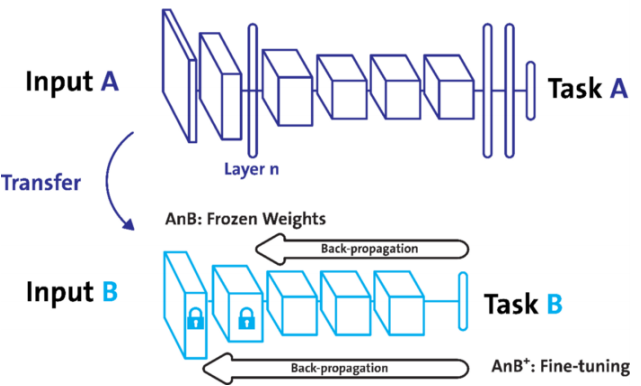

In [ ]:
# vgg16 모델을 vgg에 할당
vgg = models.vgg16(pretrained=True).to(device)

class MyNewNet(nn.Module):
    def __init__(self):
        super(MyNewNet, self).__init__()
        self.vgg19 = models.vgg19(pretrained=True)
        # 모델의 마지막 Linear Layer 추가
        self.linear_layers = nn.Linear(1000, 1)

# Defining the forward pass
def forward(self, x):
    x = self.vgg19(x)
    return self.linear_layers(x)

# 마지막 레이어를 제외하고 frozen
for param in my_model.parameters():
		param.requires_grad = False
for param in my_model.linear_layers.parameters():
		param.requires_grad = True